# Plotting with Mayavi

You can use Mayavi to plot with Maybrain by using the module `plotting.mayavi_wrapper` and specifically the `MayaviWrapper` class. We are aware that the installation process with Mayavi gives some troubles, so this module is not imported automatically with Maybrain (you have to explicitly import it).


## Configurations for Jupyter Notebook
If you want to test Mayavi's data visualisation features in this notebook, you will have to do some pre-configurations.

This section (Configurations for Jupyter Notebook) will explain what pre-configurations you need. If you run mayavi data visualisation features in your computer (ie. without Jupyter), you **do not** need to run what is inside this section because a separate window will open automatically for you as soon as you start running Maybrain code.

First, you need to install *nbextension* to Jupyter Notebook so we can interact with mayavi in this notebook. You just need to run this command once. Note that you do not need to "enable" the extension or anything after you run the code below:

In [ ]:
%%bash
jupyter nbextension install --py mayavi --user

Jupyter Notebook has some restrictions for data visualisation. In order to allow Jupyter Notebook to show our graphics, you have to change your local configurations, by running the following code in a terminal:

In [ ]:
%%bash
jupyter notebook --generate-config

You will see from the output of the previous command a location of a file with the local configurations of Jupyter Notebook. Open that file and search for the following piece of code:

```python
## (bytes/sec) Maximum rate at which messages can be sent on iopub before they
#  are limited.
#c.NotebookApp.iopub_data_rate_limit = 1000000
```
Just uncomment the last line and increase the value of that variable, for example to something like this:

```python
## (bytes/sec) Maximum rate at which messages can be sent on iopub before they
#  are limited.
c.NotebookApp.iopub_data_rate_limit = 100000000000
```

Finally, just run the following python code here in the notebook so we will be able to see our graphics (`backend = "x3d"` is to define that mayavi will show our data in an interactive way):

In [1]:
from mayavi import mlab
mlab.init_notebook(width=500, height=500, backend = "x3d")

Notebook initialized with x3d backend.


## Plotting nodes

The easiest thing to start plotting is the nodes our brain (remember we are using the matrices from [this folder](https://github.com/RittmanResearch/maybrain/tree/master/docs/data)).

So, first, we create our brain:

In [2]:
from maybrain import brain as mbt
from maybrain import resources as rr
from maybrain.plotting import mayavi_wrapper as mbp
from mayavi import mlab
a = mbt.Brain()
a.import_adj_file(rr.DUMMY_ADJ_FILE_500)
a.import_spatial_info(rr.MNI_SPACE_COORDINATES_500)
a.apply_threshold()

We can now create our own *MayaviWrapper*, and tell it to plot our brain coordinates (nodes):

In [3]:
b = mbp.MayaviWrapper()
b.plot_brain_coords(a)

If you are running this code directly in the Jupyter Notebook, you will not see anything, and you will have to run an extra line of code so mayavi can plot our brain nodes in this notebook (try to use your mouse to rotate and zoom it; tip: try to use the CTRL key):

In [4]:
b.mfig

## Adding a Brain Background

In order to see our connectivity, we will start by applying a threshold for easier visualisation, and import a background template of a brain, which we provide in [this folder](https://github.com/RittmanResearch/maybrain/tree/master/docs/data). After that, we create a new *MayaviWrapper* to plot this new brain:

In [5]:
a.apply_threshold(threshold_type="edgePC", value=0.9)
a.import_background("data/MNI152_T1_2mm_brain.nii.gz")

b = mbp.MayaviWrapper()
b.plot_brain_coords(a, col=(1,0,0)) #the (1,0,0) represents a RGB colour, in this case just red
b.plot_skull(a)
b.plot_brain_edges(a, opacity=0.8, lw=4.) #lw is the line width

# View the brain from a specific perspective
mlab.view(0, 180)

automatically generated label: plot 0000


(0.0, 180.0, 181.0, array([ 45.5  ,  55.5  ,  39.375]))

As you already know, in order to view the previous brain in this notebook we need to call `b.mfig`, but this time we will be calling first `mlab.init_notebook()` again, indicating that we want to generate an image (`backend = "png"`), rather than an interactive brain which we can move:

Notebook initialized with png backend.



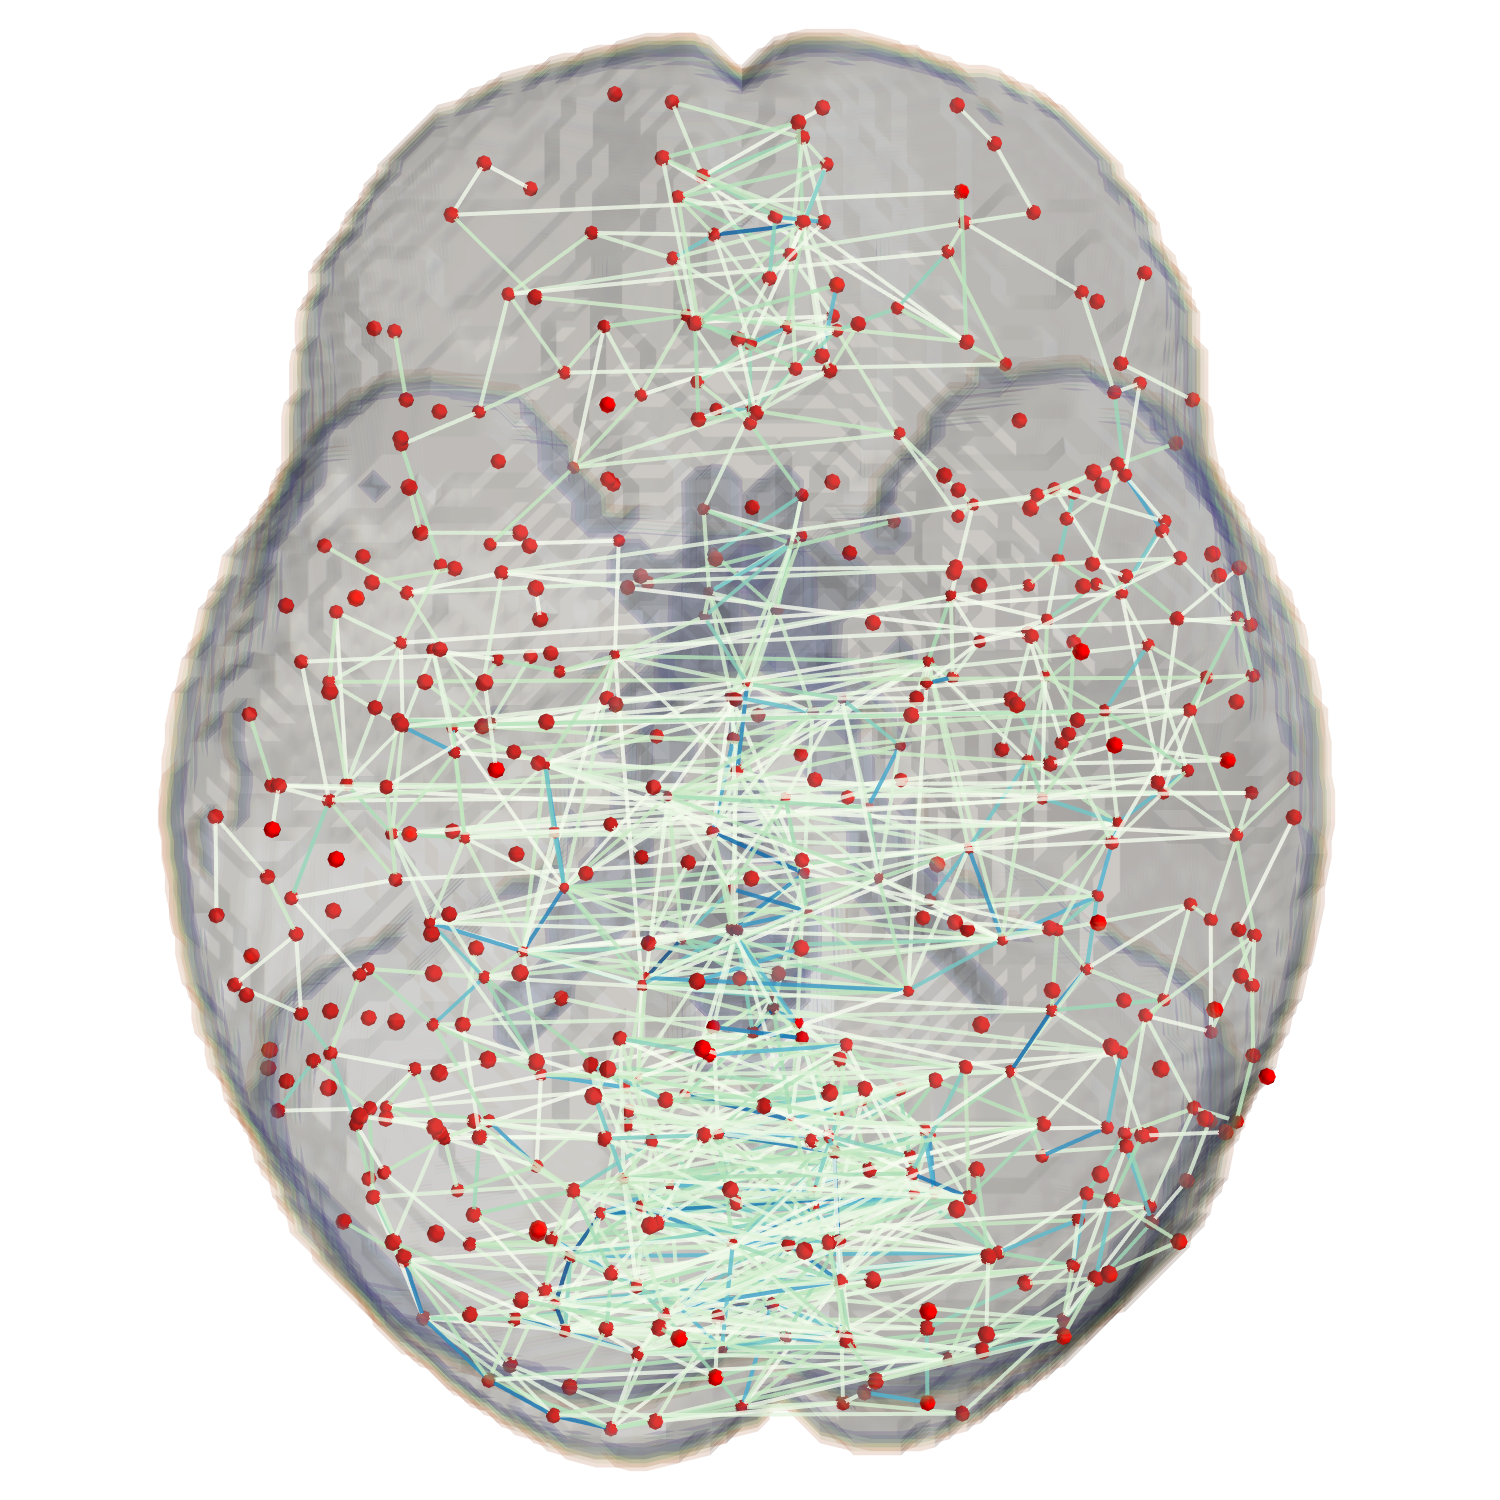

In [6]:
mlab.init_notebook(backend = "png")
b.mfig

We can see the brain by other perspective using the function `mlab.view()`:


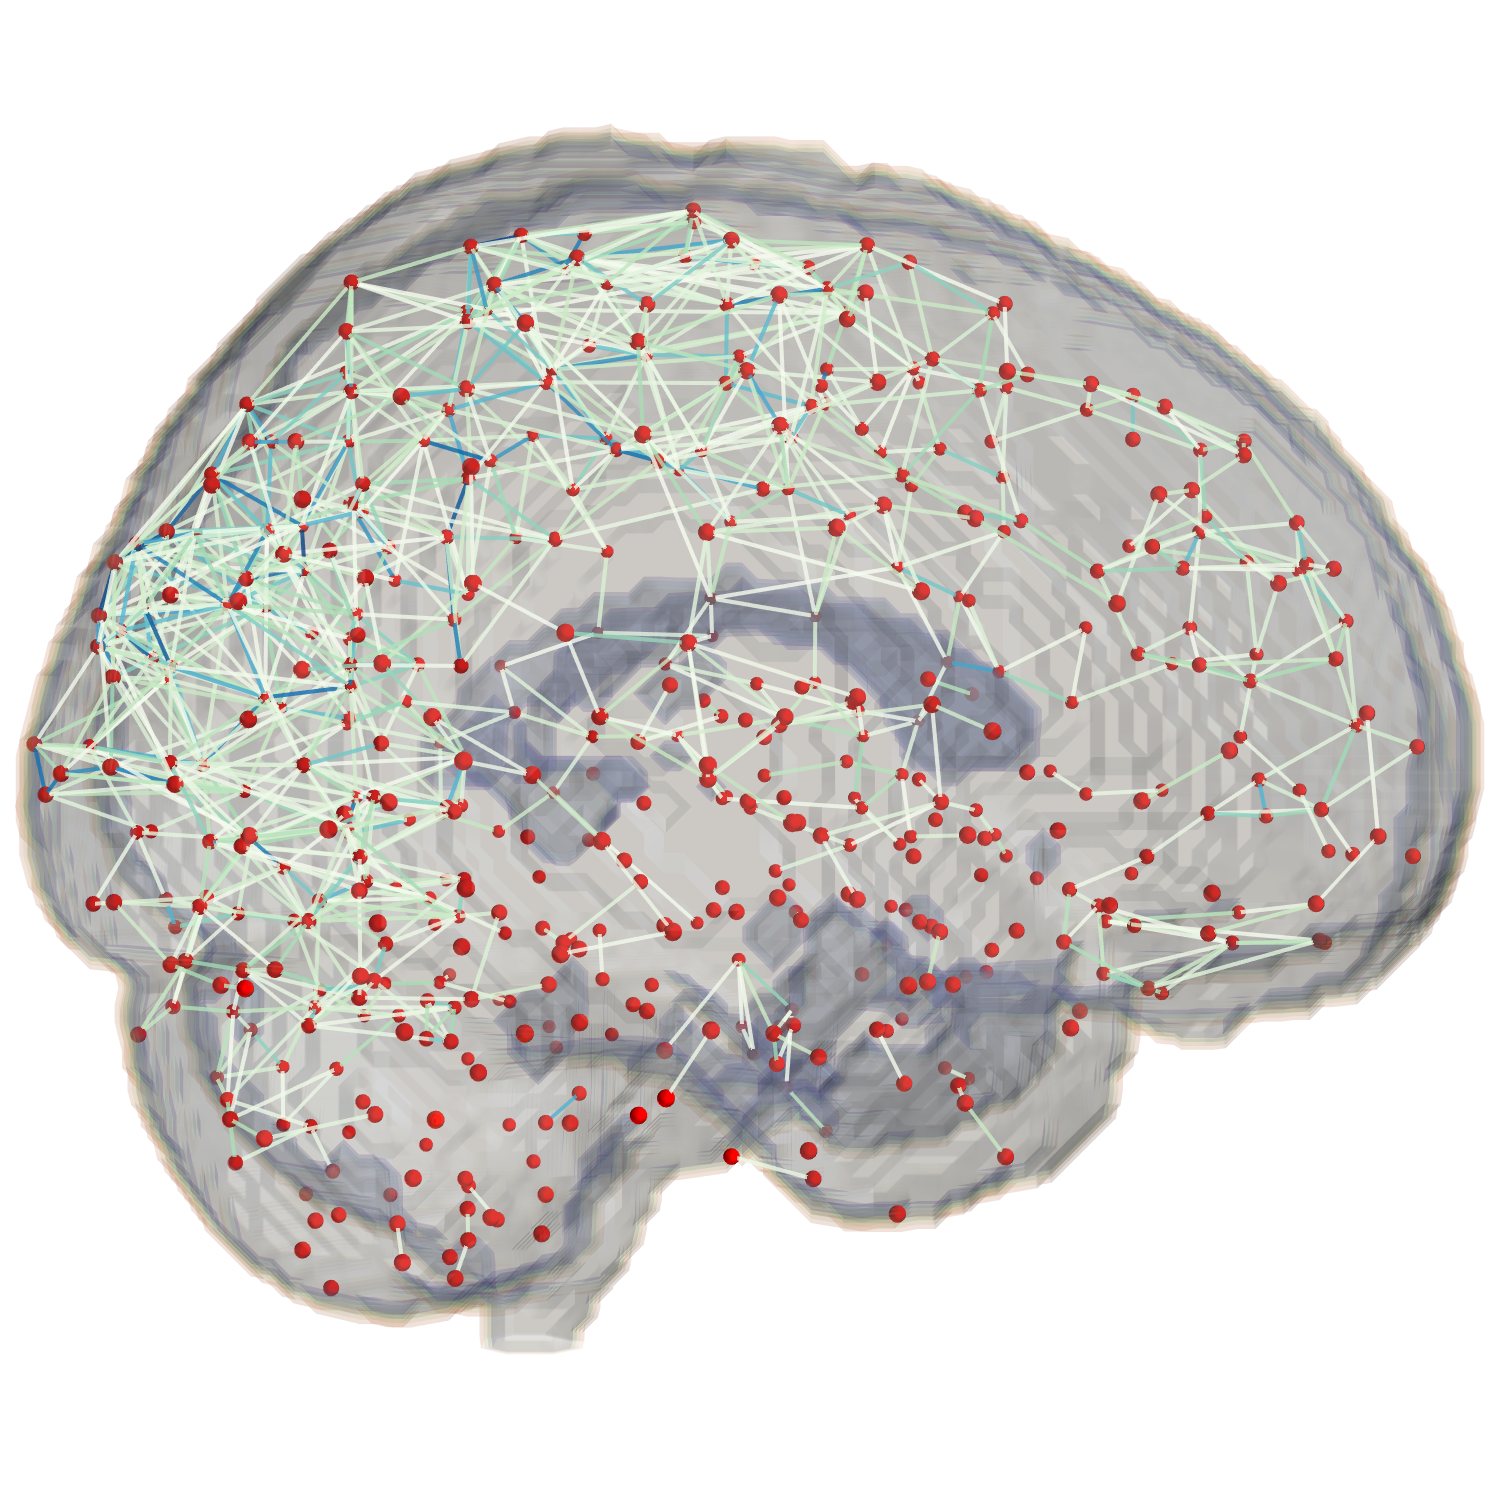

In [7]:
mlab.view(0, 90)
b.mfig